# 데이터 불러오기

In [2]:
### 패키지 설치 
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import plotly.graph_objs as go

import time
from tqdm import tqdm
import random

In [309]:
df=pd.read_csv('data/funda.csv')

# 업종구성비율

- d사 
교육 서비스업, 도매 및 상품 중개업 평균 이하 / 
음식점 및 주점업 평균 이상

- e사 
음식점 및 주점업 평균 이하 / 
교육 서비스업, 도매 및 상품 중개업 평균 이상

- f사
도매 및 상품 중개업, 음식점 및 주점업 평균 이하 / 
교육 서비스업, 자동차 및 부품 판매업 평균 이상

- g사
소매업 평균 이하 / 
교육 서비스업, 도매 및 상품 중개업 평균 이상

- h사
도매 및 상품 중개업, 음식점 및 주점업, 자동차 및 부품 판매업 평균 이하 / 
교육 서비스업, 소매업 평균 이상

In [197]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="a사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [4]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="b사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [4]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')
df3

,card_company,biz,amount,ratio
0,b,개인 및 소비용품 수리업,51908652,0.013739
1,b,"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",1734358,0.000459
2,b,교육 서비스업,558278971,0.147766
3,b,기타 개인 서비스업,245313317,0.064930
4,b,"기타 전문, 과학 및 기술 서비스업",38856534,0.010285
5,b,기타 제품 제조업,12004848,0.003177
6,b,도매 및 상품 중개업,436547191,0.115546
7,b,보건업,60834174,0.016102
8,b,사업 지원 서비스업,28495967,0.007542
9,b,섬유제품 제조업; 의복 제외,3161988,0.000837


In [12]:
df3=df3[(df3['biz']=='음식점 및 주점업')|(df3['biz']=='소매업; 자동차 제외')|(df3['biz']=='도매 및 상품 중개업')|(df3['biz']=='교육 서비스업')|(df3['biz']=='기타 개인 서비스업')]

In [17]:
df3=df3[(df3['biz']=='음식점 및 주점업')|(df3['biz']=='소매업; 자동차 제외')|(df3['biz']=='도매 및 상품 중개업')|(df3['biz']=='교육 서비스업')|(df3['biz']=='기타 개인 서비스업')]
fig = px.bar(df3, x="biz", y="ratio", 
             color='card_company', barmode='group',template='simple_white', opacity=0.8,
             title="b사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [5]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='c']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="c사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [6]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="d사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [7]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='e']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="e사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [8]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='f']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="f사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [9]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='g']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="g사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [10]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz", y="ratio", 
             color='card_company',
             title="h사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [193]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3=df[df['card_company']=='a']
df3=df3.groupby(['card_company','biz'])['amount'].sum().to_frame()
df3=df3.reset_index()
df3['ratio']=df3['amount']/df3['amount'].sum()

df4=df[df['card_company']=='b']
df4=df4.groupby(['card_company','biz'])['amount'].sum().to_frame()
df4=df4.reset_index()
df4['ratio']=df4['amount']/df4['amount'].sum()

df5=df[df['card_company']=='f']
df5=df5.groupby(['card_company','biz'])['amount'].sum().to_frame()
df5=df5.reset_index()
df5['ratio']=df5['amount']/df5['amount'].sum()

df6= df1.append([df2,df3,df4,df5])
df6 = df6.fillna('전체')

df6

,biz,amount,ratio,card_company
0,개인 및 소비용품 수리업,463014666,0.018046,전체
1,"건축 기술, 엔지니어링 및 기타 과학기술 서비스업",11277728,0.000440,전체
2,교육 서비스업,3726017586,0.145220,전체
3,기타 개인 서비스업,1547842517,0.060326,전체
4,"기타 전문, 과학 및 기술 서비스업",239018661,0.009316,전체
...,...,...,...,...
20,자동차 및 부품 판매업,109473385,0.044414,f
21,전기장비 제조업,158418,0.000064,f
22,전문 서비스업,3913991,0.001588,f
23,전문직별 공사업,770687,0.000313,f


In [195]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3=df[df['card_company']=='a']
df3=df3.groupby(['card_company','biz'])['amount'].sum().to_frame()
df3=df3.reset_index()
df3['ratio']=df3['amount']/df3['amount'].sum()

df4=df[df['card_company']=='b']
df4=df4.groupby(['card_company','biz'])['amount'].sum().to_frame()
df4=df4.reset_index()
df4['ratio']=df4['amount']/df4['amount'].sum()

df5=df[df['card_company']=='f']
df5=df5.groupby(['card_company','biz'])['amount'].sum().to_frame()
df5=df5.reset_index()
df5['ratio']=df5['amount']/df5['amount'].sum()

df6= df1.append([df2,df3,df4,df5])
df6=df6.fillna('전체')

fig = px.line(df6, x="biz", y="ratio", 
             color='card_company',
             title="h사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

# 시간별

In [233]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", template='simple_white',
             color='card_company',
             title="a사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [23]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company', template='simple_white',
#              color_discrete_sequence=px.colors.qualitative.Plotly,
             title="b사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [13]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='c']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company',
             title="c사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [14]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company',
             title="d사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [15]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='e']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company',
             title="e사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [16]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='f']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company',
             title="f사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [17]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='g']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company',
             title="g사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [18]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company',
             title="h사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

# 지역별

In [21]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="a사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

In [22]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="b사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

In [ ]:
##top5
경기	984011707
서울	645331571
부산	326725344
경남	200097815
경북	

In [23]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='c']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="c사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

In [24]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="d사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

In [25]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='e']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="e사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

In [26]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='f']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="f사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

In [27]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='g']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="g사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

In [20]:
df1=df.groupby(['sido'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','sido'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="sido", y="ratio", 
             color='card_company',
             title="h사 지역구성비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='지역',
                  yaxis_title='비율')
fig.show()

# 연도별

In [29]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="a사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

In [30]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="b사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

In [31]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='c']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="c사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

In [32]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="d사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

In [33]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='e']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="e사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

In [34]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='f']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="f사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

In [35]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='g']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="g사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

In [36]:
df1=df.groupby(['year'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','year'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="year", y="ratio", 
             color='card_company',
             title="h사 연도별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='연도',
                  yaxis_title='비율')
fig.show()

# 월별

In [54]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="a사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

In [55]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="b사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

In [56]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='c']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="c사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

In [57]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="d사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

In [58]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='e']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="e사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

In [59]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='f']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="f사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

In [60]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='g']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="g사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

In [61]:
df1=df.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','month'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="month", y="ratio", 
             color='card_company',
             title="h사 월별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='월',
                  yaxis_title='비율')
fig.show()

# 휴일

In [53]:
df1=df.groupby(['holidays'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','holidays'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.bar(df3, x="holidays", y="ratio", 
             color='card_company', barmode='group',
             title="d사 휴일과 평일 매출 비율")
fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='평일 / 휴일',
                  yaxis_title='비율')
fig.show()

# 자영업 집중업종

In [62]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="a사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [63]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="b사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [64]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='c']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="c사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [65]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="d사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [66]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='e']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="e사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [67]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='f']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="f사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [68]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='g']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="g사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [69]:
df1=df.groupby(['biz10'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','biz10'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="biz10", y="ratio", 
             color='card_company',
             title="h사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

# 요일별

In [106]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company',
             title="a사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [105]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company',
             title="b사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [107]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='c']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company', 
             title="c사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [108]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='d']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company', 
             title="d사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [109]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='e']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company', 
             title="e사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [110]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='f']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company', 
             title="f사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [103]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='g']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company', 
             title="g사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [111]:
df1=df.groupby(['dayofweek'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='h']
df2=df2.groupby(['card_company','dayofweek'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="dayofweek", y="ratio", 
             color='card_company',
             title="h사 요일별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='요일',
                  yaxis_title='비율')
fig.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318388 entries, 0 to 2318387
Data columns (total 22 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   store_id          int64 
 1   card_id           int64 
 2   card_company      object
 3   transacted_date   object
 4   transacted_time   object
 5   installment_term  int64 
 6   region            object
 7   type_of_business  object
 8   amount            int64 
 9   year              int64 
 10  month             int64 
 11  dayofweek         int64 
 12  season            object
 13  quarter           int64 
 14  hour              int64 
 15  sido              object
 16  city              object
 17  holidays          int64 
 18  biz               object
 19  BIZ               object
 20  area              object
 21  biz10             object
dtypes: int64(10), object(12)
memory usage: 389.1+ MB


# b사

In [106]:
df1=df.groupby(['biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['card_company','biz'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')
df3=df3[(df3['biz']=='음식점 및 주점업')|(df3['biz']=='소매업; 자동차 제외')|(df3['biz']=='도매 및 상품 중개업')|(df3['biz']=='교육 서비스업')|(df3['biz']=='기타 개인 서비스업')]

fig = px.bar(df3, x="biz", y="ratio", 
             color='card_company', barmode='group',template='simple_white', opacity=0.8,
             title="b사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [108]:
df1=df.groupby(['dayofweek'])['amount'].mean().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='b']
df2=df2.groupby(['dayofweek','holidays'])['amount'].mean().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')
df3

,dayofweek,holidays,amount,ratio
0,0,0,10900.692556,0.101029
1,0,1,8045.081015,0.074562
2,1,0,11079.062579,0.102682
3,1,1,7993.662607,0.074086
4,2,0,10729.130156,0.099438
5,2,1,7724.849810,0.071595
6,3,0,10442.643242,0.096783
7,3,1,6721.874765,0.062299
8,4,0,10703.566250,0.099202
9,4,1,7026.047861,0.065118


In [122]:
df2=df.groupby(['dayofweek','holidays'])['amount'].mean().to_frame()
df2=df2.reset_index()
df2.loc[12]=[5,0,0]
df2.loc[13]=[6,0,0]
df2

,dayofweek,holidays,amount
0,0,0,12404.483246
1,0,1,8621.719331
2,1,0,12510.294663
3,1,1,8520.748779
4,2,0,12316.736891
5,2,1,8445.020620
6,3,0,11883.353604
7,3,1,8183.916795
8,4,0,11369.873928
9,4,1,7456.484122


In [127]:
df2=df.groupby(['dayofweek','holidays'])['amount'].mean().to_frame()
df2=df2.reset_index()
df2.loc[12]=[5,0,0]
df2.loc[13]=[6,0,0]
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

fig = px.bar(df2, x=index, y="amount", 
             color='holidays', barmode='group',template='simple_white', opacity=0.8,
             title="b사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

ValueError: All arguments should have the same length. The length of column argument `df[y]` is 14, whereas the length of  previously-processed arguments ['x'] is 7

In [109]:
df1=df.groupby(['dayofweek'])['amount'].mean().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df2.groupby(['dayofweek','holidays'])['amount'].mean().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.bar(df3, x="dayofweek", y="amount", 
             color='holidays', barmode='group',template='simple_white', opacity=0.8,
             title="b사 업종구성 비율(거래금액 기준)")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='업종',
                  yaxis_title='비율')
fig.show()

In [138]:
aa=pd.DataFrame(df['installment_term'].unique())
# aa.to_excel("data/installment.xlsx", index=False)

In [128]:
df['installment_term'].value_counts().sort_index()

0     2217648
2       18096
3       60279
4        2050
5       10054
6        4722
7         209
8         151
9         131
10       2976
11         27
12        982
14          4
15         64
16          8
18        195
20         68
23          2
24        223
30          6
36         30
60        384
63          1
80         69
82          2
83          5
93          2
Name: installment_term, dtype: int64

In [32]:
df2=df[df['card_company']=='b']
df2=df2.groupby(['biz','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()

fig = px.line(df2, x="hour", y="amount", 
             color='biz', template='simple_white',
#              color_discrete_sequence=px.colors.qualitative.Plotly,
             title="b사>업종별>시간별 매출")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [34]:
df2=df[(df['card_company']=='b')]
df2=df2[(df2['biz']=='음식점 및 주점업')|(df2['biz']=='소매업; 자동차 제외')|(df2['biz']=='도매 및 상품 중개업')|(df2['biz']=='교육 서비스업')|(df2['biz']=='기타 개인 서비스업')]
df2=df2.groupby(['biz','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()

fig = px.line(df2, x="hour", y="amount", 
             color='biz', template='simple_white',
#              color_discrete_sequence=px.colors.qualitative.Plotly,
             title="b사>업종별>시간별 매출")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='매출')
fig.show()

In [35]:
df2=df[(df['card_company']=='b')]
df2=df2[(df2['sido']=='경기')|(df2['sido']=='서울')|(df2['sido']=='부산')]
df2=df2.groupby(['sido','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()

fig = px.line(df2, x="hour", y="amount", 
             color='sido', template='simple_white',
#              color_discrete_sequence=px.colors.qualitative.Plotly,
             title="b사>시도별>시간별 매출")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='매출')
fig.show()

In [38]:
df2=df[(df['card_company']=='b')]
monlist=df.month.unique().tolist()
a=pd.DataFrame()

for i in monlist:
    a=a.append(df2[df2['month']==i].groupby(['month','year'])['amount'].sum().to_frame())
    
a=a.reset_index()
fig = px.bar(a, x="year", y="amount", facet_col="month", facet_col_wrap= 4,
             title="동월 거래금액")
fig.show()

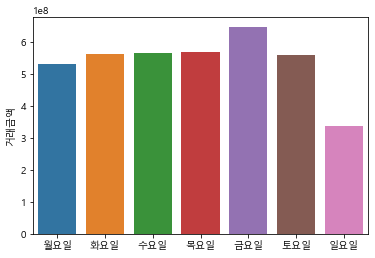

In [45]:
df2=df[(df['card_company']=='b')]
train_company_agg3 = pd.DataFrame(df2.groupby(['dayofweek']).amount.sum()).reset_index()

index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
sns.barplot(x=index,y="amount",data=train_company_agg3,ci=None).set(#xlabel='요일',
                                       ylabel='거래금액')
# plt.title('b사의 요일별 거래금액',fontsize=15)
plt.show()

In [61]:
df2=df[(df['card_company']=='b')]
a = pd.DataFrame(df2.groupby(['dayofweek']).amount.sum()).reset_index()
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

fig = px.bar(a, x=index, y="amount",template='simple_white', color=index,
             title="요일별 거래금액")
fig.show()

In [58]:
df2=df[(df['card_company']=='b')]
a = pd.DataFrame(df2.groupby(['dayofweek']).amount.sum()).reset_index()
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
colors = ['lightslategray',] * 7
colors[4] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=index,
    y=a.amount,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='요일별 매출액',template='simple_white')

In [59]:
# b사
dff=df[df['card_company']=='b']
df_sum=dff.groupby(['transacted_date'])['amount'].sum().to_frame()
df_sum=df_sum.reset_index()
fig=px.line(df_sum,x='transacted_date', y='amount',title='날짜별 거래금액',template='simple_white')
fig.show()

## 포인트

In [64]:
point = df[(df['installment_term']>=60)&(df['card_company']=='b')]

In [103]:
point_sum=df.groupby(['hour'])['amount'].count().to_frame()
point_sum=point_sum.reset_index()
fig = px.bar(point_sum, x="hour", y="amount", template='simple_white',
            title='포인트 사용거래 시간별 건수')

fig.update_layout(xaxis_title='시간',
                  yaxis_title='거래건수')
fig.show()

In [67]:
point.biz.value_counts()

음식점 및 주점업              150
소매업; 자동차 제외            112
기타 개인 서비스업              41
교육 서비스업                 24
도매 및 상품 중개업             19
스포츠 및 오락관련 서비스업         12
창작, 예술 및 여가관련 서비스업       8
숙박업                      8
식료품 제조업                  3
사업 지원 서비스업               2
기타 전문, 과학 및 기술 서비스업      1
섬유제품 제조업; 의복 제외          1
임대업; 부동산 제외              1
자동차 및 부품 판매업             1
기타 제품 제조업                1
개인 및 소비용품 수리업            1
Name: biz, dtype: int64

In [101]:
df1=point.groupby(['biz'])['amount'].count().to_frame()
df1=df1.reset_index()
df1['sum']=sum(df1['amount'])
df1['ratio']=df1['amount']/df1['sum']
df1=df1.sort_values(by='ratio',ascending=False)

fig = px.bar(df1, x="ratio", y="biz", color="biz",color_discrete_sequence=px.colors.qualitative.Pastel,
             title="포인트 사용거래 업종구성비율",template='simple_white')
fig.update_traces(texttemplate=' %{x:.2p}',textposition='inside',textfont_size=10)
fig.show()

In [104]:
df1=point.groupby(['sido'])['amount'].count().to_frame()
df1=df1.reset_index()
df1['sum']=sum(df1['amount'])
df1['ratio']=df1['amount']/df1['sum']
df1=df1.sort_values(by='ratio',ascending=False)

fig = px.bar(df1, x="ratio", y="sido", color="sido",color_discrete_sequence=px.colors.qualitative.Pastel,
             title="포인트 사용거래 지역비율",template='simple_white')
fig.update_traces(texttemplate=' %{x:.2p}',textposition='inside',textfont_size=10)
fig.update_layout(xaxis_title=' ',
                  yaxis_title=' ')
fig.show()

<AxesSubplot:>

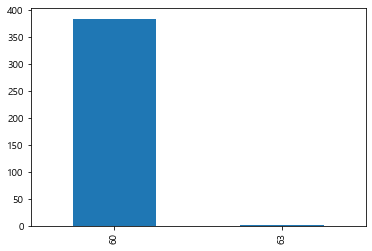

In [97]:
point['installment_term'].value_counts().plot.bar()

In [99]:
point_sum=df.groupby(['month'])['amount'].count().to_frame()
point_sum=point_sum.reset_index()
fig = px.bar(point_sum, x="month", y="amount", template='simple_white',
            title='포인트 사용거래 시간별 매출')

fig.update_layout(xaxis_title='월',
                  yaxis_title='매출')
fig.show()

# 할부

In [140]:
df=pd.read_csv('data/funda.csv')

## 할부개월수별 업종

In [142]:
df.groupby(['installment','biz'])['amount'].count()

installment  biz                        
0            개인 및 소비용품 수리업                   24008
             건축 기술, 엔지니어링 및 기타 과학기술 서비스업       695
             교육 서비스업                         91292
             기타 개인 서비스업                     224746
             기타 전문, 과학 및 기술 서비스업              6220
                                             ...  
24           음식점 및 주점업                         142
             자동차 및 부품 판매업                      269
36           소매업; 자동차 제외                         3
             음식점 및 주점업                           6
             자동차 및 부품 판매업                       29
Name: amount, Length: 104, dtype: int64

In [148]:
df1=df.groupby(['installment','biz'])['amount'].count().to_frame()
df1=df1.reset_index()
df1=df1['installment'].astype(str)
df1

0       0
1       0
2       0
3       0
4       0
       ..
99     24
100    24
101    36
102    36
103    36
Name: installment, Length: 104, dtype: object

In [159]:
df1=df.groupby(['installment','biz'])['amount'].count().to_frame()
df1=df1.reset_index()
df1['installment']=df1['installment'].astype(str)
df1['sum']=df1.groupby(['installment'])['amount'].transform('sum')
df1['ratio']=df1['amount']/df1['sum']

fig = px.bar(df1, x="ratio", y="installment", color="biz",color_discrete_sequence=px.colors.qualitative.Pastel,
             title="할부개월수별 업종구성비율",text='biz')
fig.update_traces(textposition='inside',textfont_size=12)
fig.show()

In [162]:
df=pd.read_csv('data/funda.csv')

In [163]:
df1=df.groupby(['installment','biz'])['amount'].count().to_frame()
df1=df1.reset_index()
df1['installment']=df1['installment'].astype(str)
df1['sum']=df1.groupby(['installment'])['amount'].transform('sum')
df1['ratio']=df1['amount']/df1['sum']

fig = px.bar(df1, x="ratio", y="installment", color="biz",color_discrete_sequence=px.colors.qualitative.Pastel,
             title="할부개월수별 업종구성비율",text='biz')
fig.update_traces(textposition='inside',textfont_size=12)
fig.show()

In [166]:
df=pd.read_csv('data/funda(1).csv')

df1=df.groupby(['installment','biz'])['amount'].count().to_frame()
df1=df1.reset_index()
df1['installment']=df1['installment'].astype(str)
df1['sum']=df1.groupby(['installment'])['amount'].transform('sum')
df1['ratio']=df1['amount']/df1['sum']

fig = px.bar(df1, x="ratio", y="installment", color="biz",color_discrete_sequence=px.colors.qualitative.Pastel,
             title="할부 개월수별 업종구성비율",text='biz', template='simple_white')
fig.update_traces(textposition='inside',textfont_size=12)
fig.show()

In [383]:
df1=df.groupby(['installment'])['amount'].count().to_frame()
df1=df1.reset_index()
df1['installment']=df1['installment'].astype(str)
fig = px.bar(df1, x="installment", y="amount", color="installment", template='simple_white', opacity=0.8,
             title=" ")
# fig.update_traces(textposition='inside',textfont_size=12)
fig.show()

In [398]:
df1 = pd.DataFrame(df.groupby(['installment']).amount.count()).reset_index()
df1

,installment,amount
0,0,2218032
1,2,18096
2,5,72384
3,9,5213
4,12,3985
5,18,271
6,36,407


In [400]:
df1[df1['installment']==0]

,installment,amount
0,0,2218032


In [407]:
df2=[]
df2.append(df1[df1['installment']==0]['amount'].sum())
df2.append(df1[df1['installment']!=0]['amount'].sum())
df2

[2218032, 100356]

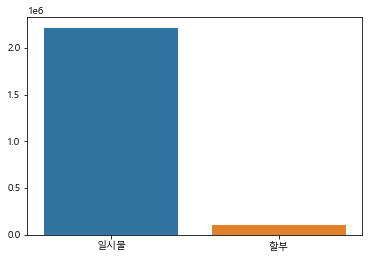

In [409]:

index = ['일시불','할부']
sns.barplot(x=index,y=[2218032, 100356])
# plt.title('b사의 요일별 거래금액',fontsize=15)
plt.show()

In [411]:
100356/(2218032+100356)

0.043286973535059704

# 전체

In [172]:
df1=df[df['installment_term']>=60]
df1

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,dayofweek,season,quarter,hour,sido,city,holidays,biz,BIZ,area,biz10,installment
1713,8,25746,b,2017-12-21,22:10,60,부산 동래구,한식 음식점업,12142,2017,12,3,winter,4,22,부산,동래구,0,음식점 및 주점업,숙박 및 음식점업,영남,요식업,0
2035,8,25746,b,2018-04-04,22:16,60,부산 동래구,한식 음식점업,13428,2018,4,2,spring,2,22,부산,동래구,0,음식점 및 주점업,숙박 및 음식점업,영남,요식업,0
2213,8,26103,b,2018-05-06,14:43,60,부산 동래구,한식 음식점업,5142,2018,5,6,spring,2,14,부산,동래구,1,음식점 및 주점업,숙박 및 음식점업,영남,요식업,0
3147,8,25746,b,2018-08-24,21:45,60,부산 동래구,한식 음식점업,28428,2018,8,4,summer,3,21,부산,동래구,0,음식점 및 주점업,숙박 및 음식점업,영남,요식업,0
4101,8,27652,b,2018-12-10,20:05,60,부산 동래구,한식 음식점업,5857,2018,12,0,winter,4,20,부산,동래구,0,음식점 및 주점업,숙박 및 음식점업,영남,요식업,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275291,1666,3588383,b,2018-03-05,15:30,60,울산 남구,자동차 종합 수리업,60971,2018,3,0,spring,1,15,울산,남구,0,개인 및 소비용품 수리업,"협회 및 단체, 수리 및 기타 개인 서비스업",영남,"자동차정비,부품",0
2287371,1768,3817000,b,2016-11-04,19:46,60,울산 동구,안경 및 렌즈 소매업,1714,2016,11,4,fall,4,19,울산,동구,0,소매업; 자동차 제외,도매 및 소매업,영남,"의류, 잡화판매",0
2288182,1768,3817000,b,2017-06-29,20:27,60,울산 동구,안경 및 렌즈 소매업,1714,2017,6,3,summer,2,20,울산,동구,0,소매업; 자동차 제외,도매 및 소매업,영남,"의류, 잡화판매",0
2302460,1814,3914683,b,2017-11-25,15:57,60,울산 남구,서양식 음식점업,4542,2017,11,5,fall,4,15,울산,남구,1,음식점 및 주점업,숙박 및 음식점업,영남,요식업,0


In [175]:
df1=df[df['installment_term']>=60]
df1=df1.groupby(['installment_term','type_of_business'])['amount'].count().to_frame()
df1=df1.reset_index()
df1['installment_term']=df1['installment_term'].astype(str)
df1['sum']=df1.groupby(['installment_term'])['amount'].transform('sum')
df1['ratio']=df1['amount']/df1['sum']

fig = px.bar(df1, x="ratio", y="installment_term", color="type_of_business",color_discrete_sequence=px.colors.qualitative.Pastel,
             title="할부 개월수별 업종구성비율",text='type_of_business', template='simple_white')
fig.update_traces(textposition='inside',textfont_size=12)
fig.show()

In [ ]:
dfdf=df[df['installment_term']>=60]
df1=dfdf.groupby(['card_company','year'])['amount'].sum().to_frame()
df1=df1.reset_index()
fig = px.bar(df1, x="year", y="amount",color="card_company",facet_col='card_company', template='simple_white', opacity=0.8,
             title="연도별 포인트이용 거래금액")
fig.show()

In [189]:
df1=df[df['installment_term']>=60]
df1=df1.groupby(['card_company','year','biz'])['amount'].sum().to_frame()
df1=df1.reset_index()
fig = px.bar(df1, x="year", y="amount", color="biz",facet_col='card_company', template='simple_white', opacity=0.8,
             title=" ")
# fig.update_traces(textposition='inside',textfont_size=12)
fig.show()

In [235]:
# 요일
df_m = df[df['dayofweek']==0]
df_t1 = df[df['dayofweek']==1]
df_w = df[df['dayofweek']==2]
df_t2 = df[df['dayofweek']==3]
df_f = df[df['dayofweek']==4]
df_s1 = df[df['dayofweek']==5]
df_s2 = df[df['dayofweek']==6]

cnt_srs_m = df_m.groupby('hour')['amount'].sum()
cnt_srs_t1 = df_t1.groupby('hour')['amount'].sum()
cnt_srs_w = df_w.groupby('hour')['amount'].sum()
cnt_srs_t2 = df_t2.groupby('hour')['amount'].sum()
cnt_srs_f = df_f.groupby('hour')['amount'].sum()
cnt_srs_s1 = df_s1.groupby('hour')['amount'].sum()
cnt_srs_s2 = df_s2.groupby('hour')['amount'].sum()

trace_m = scatter_plot(cnt_srs_m, 'red', True ,'monday')
trace_t1 = scatter_plot(cnt_srs_t1, 'blue', True ,'tuesday')
trace_w = scatter_plot(cnt_srs_w, 'green', True ,'wendsday')
trace_t2 = scatter_plot(cnt_srs_t2, 'yellow', True ,'thursday')
trace_f = scatter_plot(cnt_srs_f, 'black', True ,'friday')
trace_s1 = scatter_plot(cnt_srs_s1, 'purple', True ,'saturday')
trace_s2 = scatter_plot(cnt_srs_s2, 'indigo', True ,'sunday')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='sum amount in df set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace_m,trace_t1,trace_w,trace_t2,trace_f,trace_s1,trace_s2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [243]:
a = pd.DataFrame(df.groupby(['dayofweek']).amount.sum()).reset_index()
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

fig = px.bar(a, x=index, y="amount",template='simple_white', color=index,color_discrete_sequence=px.colors.qualitative.Pastel_r,
             title="요일별 거래금액")
fig.show()

In [244]:

a = pd.DataFrame(df.groupby(['dayofweek']).amount.sum()).reset_index()
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
colors = ['lightslategray',] * 7

fig = go.Figure(data=[go.Bar(
    x=index,
    y=a.amount,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='요일별 매출액',template='simple_white')

In [245]:
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace


df1 = df[df['holidays']==0]
df2 = df[df['holidays']==1]

cnt_srs1 = df1.groupby('hour')['amount'].sum()
cnt_srs2 = df2.groupby('hour')['amount'].sum()

trace1 = scatter_plot(cnt_srs1, 'red', True ,'weekday')
trace2 = scatter_plot(cnt_srs2, 'blue', True ,'holiday')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='sum amount in df set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [308]:
df1=df[(df['holidays']==1)]
df1=df1.groupby(['holidays','hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[(df['holidays']==0)]
df2=df2.groupby(['holidays','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)

df3['holidays']=df3['holidays'].astype(str)

fig = px.line(df3, x="hour", y="ratio", template='simple_white', 
             color='holidays',
             title="휴일과 평일 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [381]:
a = df.groupby('type_of_business')['amount'].agg(['sum','count','mean'])
a = a.reset_index()
a['단가']= round(a['sum']/a['count'])
a.sort_values(by='단가')

,type_of_business,sum,count,mean,단가
117,체인화 편의점,3870190,2430,1592.670782,1593.0
53,떡류 제조업,10463983,5732,1825.537858,1826.0
59,비알코올 음료점업,143245222,72720,1969.818784,1970.0
75,신선 식품 및 단순 가공 식품 도매업,506248,231,2191.549784,2192.0
50,당구장 운영업,54264440,24486,2216.141469,2216.0
...,...,...,...,...,...
112,"주방용품 및 가정용 유리, 요업제품 소매업",52841240,551,95900.617060,95901.0
101,일반병원,360946562,2668,135287.317091,135287.0
9,경영 컨설팅업,95166821,631,150819.050713,150819.0
34,기타 산업용 농산물 도매업,318948356,1153,276624.766696,276625.0


In [380]:
a.sort_values(by='단가')

,type_of_business,sum,count,단가
117,체인화 편의점,3870190,2430,1593.0
53,떡류 제조업,10463983,5732,1826.0
59,비알코올 음료점업,143245222,72720,1970.0
75,신선 식품 및 단순 가공 식품 도매업,506248,231,2192.0
50,당구장 운영업,54264440,24486,2216.0
...,...,...,...,...
112,"주방용품 및 가정용 유리, 요업제품 소매업",52841240,551,95901.0
101,일반병원,360946562,2668,135287.0
9,경영 컨설팅업,95166821,631,150819.0
34,기타 산업용 농산물 도매업,318948356,1153,276625.0


# a사

In [198]:
df2=df[(df['card_company']=='a')]
a = pd.DataFrame(df2.groupby(['dayofweek']).amount.sum()).reset_index()
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
colors = ['lightslategray',] * 7
colors[4] = 'crimson'

fig = go.Figure(data=[go.Bar(
    x=index,
    y=a.amount,
    marker_color=colors # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='요일별 매출액',template='simple_white')

In [199]:
df2=df[(df['card_company']=='a')]
a = pd.DataFrame(df2.groupby(['dayofweek']).amount.sum()).reset_index()
index = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

fig = px.bar(a, x=index, y="amount",template='simple_white', color=index,
             title="요일별 거래금액")
fig.show()

In [205]:
df2=df[df['card_company']=='a']
df2=df2.groupby(['biz','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()

fig = px.line(df2, x="hour", y="amount", 
             color='biz', template='simple_white',
#              color_discrete_sequence=px.colors.qualitative.Plotly,
             title="a사>업종별>시간별 매출")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [206]:
df2=df[(df['card_company']=='a')]
df2=df2[(df2['biz']=='음식점 및 주점업')|(df2['biz']=='소매업; 자동차 제외')|(df2['biz']=='도매 및 상품 중개업')|(df2['biz']=='교육 서비스업')|(df2['biz']=='기타 개인 서비스업')]
df2=df2.groupby(['biz','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()

fig = px.line(df2, x="hour", y="amount", 
             color='biz', template='simple_white',
#              color_discrete_sequence=px.colors.qualitative.Plotly,
             title="a사>업종별>시간별 매출")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='매출')
fig.show()

In [207]:
df2=df[(df['card_company']=='a')]
df2=df2[(df2['sido']=='경기')|(df2['sido']=='서울')|(df2['sido']=='부산')]
df2=df2.groupby(['sido','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()

fig = px.line(df2, x="hour", y="amount", 
             color='sido', template='simple_white',
#              color_discrete_sequence=px.colors.qualitative.Plotly,
             title="a사>시도별>시간별 매출")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='매출')
fig.show()

In [204]:
df2=df[(df['card_company']=='a')]
monlist=df.month.unique().tolist()
a=pd.DataFrame()

for i in monlist:
    a=a.append(df2[df2['month']==i].groupby(['month','year'])['amount'].sum().to_frame())
    
a=a.reset_index()
fig = px.bar(a, x="year", y="amount", facet_col="month", facet_col_wrap= 4,
             title="동월 거래금액")
fig.show()

In [214]:
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

dff=df[(df['card_company']=='a')]
df1 = dff[dff['holidays']==0]
df2 = dff[dff['holidays']==1]

cnt_srs1 = df1.groupby('hour')['amount'].count()
cnt_srs2 = df2.groupby('hour')['amount'].count()

trace1 = scatter_plot(cnt_srs1, 'red', True ,'weekday')
trace2 = scatter_plot(cnt_srs2, 'blue', True ,'holiday')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='count in df set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [216]:
def scatter_plot(cnt_srs, color, showlegend1=False, name1 = ""):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        name = name1,
        showlegend=showlegend1,
        marker=dict(
            color=color,
        ),
    )
    return trace

dff=df[(df['card_company']=='a')]
df1 = dff[dff['holidays']==0]
df2 = dff[dff['holidays']==1]

cnt_srs1 = df1.groupby('hour')['amount'].sum()
cnt_srs2 = df2.groupby('hour')['amount'].sum()

trace1 = scatter_plot(cnt_srs1, 'red', True ,'weekday')
trace2 = scatter_plot(cnt_srs2, 'blue', True ,'holiday')

layout = go.Layout(
    height=500,
    width=1000,
    #paper_bgcolor='rgb(233,233,233)',
    title='sum amount in df set',
    #legend = ['weekday','weekend']
    #showlegend=True
    #label=['weekday','weekend']
)

data = [trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="ActivationDate")

In [ ]:
df1=df.groupby(['hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[df['card_company']=='a']
df2=df2.groupby(['holidays','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)
df3=df3.fillna('전체')

fig = px.line(df3, x="hour", y="ratio", 
             color='card_company',
             title="a사 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [234]:
df1=df[(df['card_company']=='a')&(df['holidays']==1)]
df1=df1.groupby(['holidays','hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[(df['card_company']=='a')&(df['holidays']==0)]
df2=df2.groupby(['holidays','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)

df3['holidays']=df3['holidays'].astype(str)

fig = px.line(df3, x="hour", y="ratio", template='simple_white',
             color='holidays',
             title="휴일과 평일 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [291]:
dff=df[(df['card_company']=='a')]
amount_list = []
for i in dff.store_id.unique().tolist():
    train_temp = dff.loc[dff["store_id"] == i]
    values = {"store_id": i,
              "amount" : train_temp["amount"].sum(),
              "biz" : train_temp.biz.unique(),
             "type_of_biz" : train_temp.type_of_business.unique(),
             "region" : train_temp.region.unique()}
    amount_list.append(values)

amount_list = pd.DataFrame.from_dict(amount_list)
amount_list = amount_list.sort_values(by="amount", ascending=False)

amount_list.head(10)

,store_id,amount,biz,type_of_biz,region
89,538,454246562,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
140,1408,95208550,[도매 및 상품 중개업],[기타 산업용 농산물 도매업],[대구 달서구]
41,1754,74721560,[소매업; 자동차 제외],[안경 및 렌즈 소매업],[부산 해운대구]
30,1601,51446553,[보건업],[일반병원],[부산 기장군]
102,603,45245230,[전문 서비스업],[경영 컨설팅업],[서울 금천구]
60,46,45126842,[교육 서비스업],[외국어학원],[서울 마포구]
82,145,45096261,[교육 서비스업],[기타 교육지원 서비스업],[서울 강남구]
185,253,43806097,[소매업; 자동차 제외],"[컴퓨터 및 주변장치, 소프트웨어 소매업]",[경기 성남시]
305,1900,43477853,[음식점 및 주점업],[일식 음식점업],[경기 화성시]
579,1104,42614805,[소매업; 자동차 제외],[의복 소매업],[광주 동구]


In [307]:
dff=df[(df['card_company']=='a')]
amount_list = []
for i in dff.card_id.unique().tolist():
    train_temp = dff.loc[dff["card_id"] == i]
    values = {"card_id": i,
               "store_id" : train_temp.store_id.unique(),
              "amount" : train_temp["amount"].sum(),
              "biz" : train_temp.biz.unique(),
             "type_of_biz" : train_temp.type_of_business.unique(),
             "region" : train_temp.region.unique()}
    amount_list.append(values)

amount_list = pd.DataFrame.from_dict(amount_list)
amount_list = amount_list.sort_values(by="amount", ascending=False)

amount_list.head(10)

,card_id,store_id,amount,biz,type_of_biz,region
89824,3044255,[1408],44317702,[도매 및 상품 중개업],[기타 산업용 농산물 도매업],[대구 달서구]
69493,1169818,[603],20407124,[전문 서비스업],[경영 컨설팅업],[서울 금천구]
62085,1024549,[538],19142852,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
62090,1024562,[538],16499993,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
62193,1024881,[538],15374111,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
62191,1024878,[538],13028843,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
387097,3594468,"[1670, 1778]",12028556,[교육 서비스업],"[그 외 기타 분류 안된 교육기관, 기타 교습학원]","[울산 남구, 울산 북구]"
62144,1024735,[538],11828563,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
62084,1024544,[538],11789144,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
62169,1024807,[538],11347275,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]


In [294]:
df[(df['card_company']=='a')&(df['biz']=='음식점 및 주점업')].type_of_business.value_counts().to_frame()

,type_of_business
한식 음식점업,200070
기타 주점업,27739
치킨 전문점,24292
비알코올 음료점업,21917
서양식 음식점업,20672
일식 음식점업,20272
간이 음식 포장 판매 전문점,14675
"피자, 햄버거, 샌드위치 및 유사 음식점업",12274
중식 음식점업,9328
김밥 및 기타 간이 음식점업,8434


In [301]:
df[(df['card_company']=='a')&(df['biz']=='음식점 및 주점업')].groupby('type_of_business')['amount'].sum().sort_values(ascending=False).to_frame()

,amount
type_of_business,
한식 음식점업,1359460583
일식 음식점업,240932189
기타 주점업,186981156
서양식 음식점업,151804164
치킨 전문점,83319253
간이 음식 포장 판매 전문점,69470521
"피자, 햄버거, 샌드위치 및 유사 음식점업",38342894
비알코올 음료점업,36410596
중식 음식점업,23163070


In [300]:
df[(df['card_company']=='a')&(df['biz']=='소매업; 자동차 제외')].groupby('type_of_business')['amount'].sum().sort_values(ascending=False).to_frame()

,amount
type_of_business,
의복 소매업,488675675
안경 및 렌즈 소매업,134272827
육류 소매업,67772423
"화장품, 비누 및 방향제 소매업",60782740
그 외 기타 분류 안된 상품 전문 소매업,55923899
"컴퓨터 및 주변장치, 소프트웨어 소매업",53203631
운동 및 경기용품 소매업,49522353
"섬유, 직물 및 의복 액세서리 소매업",43481165
화초 및 식물 소매업,39901833


In [302]:
df[(df['card_company']=='a')&(df['biz']=='교육 서비스업')].groupby('type_of_business')['amount'].sum().sort_values(ascending=False).to_frame()

,amount
type_of_business,
일반 교과학원,213982749
기타 스포츠 교육기관,131007230
외국어학원,108396015
기타 교습학원,90343123
기타 예술학원,86992696
기타 교육지원 서비스업,62746359
그 외 기타 분류 안된 교육기관,56425203
기타 기술 및 직업 훈련학원,8773137
컴퓨터 학원,7938148


In [304]:
df[(df['card_company']=='a')&(df['biz']=='음식점 및 주점업')].groupby(['sido','city'])['amount'].sum().sort_values(ascending=False).to_frame()

,,amount
sido,city,
경남,창원시,128871693
경기,화성시,81613358
제주,제주시,70104326
경기,광주시,66177883
전북,전주시,61612374
...,...,...
전남,곡성군,3092329
경기,안산시,2616016
서울,영등포구,2430549


In [306]:
df[(df['card_company']=='a')&(df['biz']=='음식점 및 주점업')&(df['city']=='창원시')].groupby(['type_of_business'])['amount'].sum().sort_values(ascending=False).to_frame()

,amount
type_of_business,
한식 음식점업,67356655
기타 주점업,28457480
서양식 음식점업,22739692
일식 음식점업,10317866


In [448]:
df1=df[(df['holidays']==1)]
df1=df1.groupby(['holidays','hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[(df['holidays']==0)]
df2=df2.groupby(['holidays','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)

fig = px.line(data_frame=df3, x="hour", y="ratio", template='simple_white',
             color='holidays',
             title="휴일과 평일 시간별 매출 비율(전체)")

fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [447]:
df1=df[(df['holidays']==1)]
df1=df1.groupby(['holidays','hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[(df['holidays']==0)]
df2=df2.groupby(['holidays','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)


df4=df[(df['card_company']=='a')&(df['holidays']==1)]
df4=df4.groupby(['card_company','holidays','hour'])['amount'].sum().to_frame()
df4=df4.reset_index()
df4['ratio']=df4['amount']/df4['amount'].sum()

df5=df[(df['card_company']=='a')&(df['holidays']==0)]
df5=df5.groupby(['card_company','holidays','hour'])['amount'].sum().to_frame()
df5=df5.reset_index()
df5['ratio']=df5['amount']/df5['amount'].sum()

df6= df5.append(df4)

df7= df6.append(df3)
# df7=df7.fillna('전체')
# df7['hour']=df7['hour'].astype(str)
df7['holidays']=df7['holidays'].astype(str)


fig = px.line(data_frame=df6, x="hour", y="ratio", template='simple_white',
             color='holidays',
             title="휴일과 평일 시간별 매출 비율")

fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [439]:
df1

,holidays,hour,amount,ratio
0,1,0,195311221,0.029995
1,1,1,134736845,0.020692
2,1,2,79948390,0.012278
3,1,3,43576130,0.006692
4,1,4,23326719,0.003582
5,1,5,6894485,0.001059
6,1,6,5378575,0.000826
7,1,7,7708513,0.001184
8,1,8,22824004,0.003505
9,1,9,62176997,0.009549


In [438]:
df2.ratio.sum()

1.0

In [424]:
np.random.seed(123)
frame_rows = 50
n_plots = 2
frame_columns = ['V_'+str(e) for e in list(range(n_plots+1))]
aa = pd.DataFrame(np.random.uniform(-10,10,size=(frame_rows, len(frame_columns))),
                  index=pd.date_range('1/1/2020', periods=frame_rows),
                    columns=frame_columns)
aa=aa.cumsum()+100
aa.iloc[0]=100
aa.reset_index(inplace=True)

aa.columns=['Timestamp','value1', 'value2', 'value3' ]
varNames=aa.columns[1:]
df_long = pd.melt(df, id_vars=['Timestamp'], value_vars=varNames, var_name='Position_type', value_name='value')

fig = px.line(data_frame=df_long, x='Timestamp', y='value', color='Position_type')
fig.show()

,Timestamp,Position_type,value
0,2020-01-01,value1,100.000000
1,2020-01-02,value1,104.955679
2,2020-01-03,value1,114.570963
3,2020-01-04,value1,112.413313
4,2020-01-05,value1,111.184758
...,...,...,...
145,2020-02-15,value3,86.418593
146,2020-02-16,value3,78.285128
147,2020-02-17,value3,79.665202
148,2020-02-18,value3,84.502445


In [336]:
df1=df[(df['holidays']==1)]
df1=df1.groupby(['holidays','hour'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['ratio']=df1['amount']/df1['amount'].sum()

df2=df[(df['holidays']==0)]
df2=df2.groupby(['holidays','hour'])['amount'].sum().to_frame()
df2=df2.reset_index()
df2['ratio']=df2['amount']/df2['amount'].sum()

df3= df2.append(df1)


df4=df[(df['card_company']=='a')&(df['holidays']==1)]
df4=df4.groupby(['card_company','holidays','hour'])['amount'].sum().to_frame()
df4=df4.reset_index()
df4['ratio']=df4['amount']/df4['amount'].sum()

df5=df[(df['card_company']=='a')&(df['holidays']==0)]
df5=df5.groupby(['card_company','holidays','hour'])['amount'].sum().to_frame()
df5=df5.reset_index()
df5['ratio']=df5['amount']/df5['amount'].sum()

df6= df5.append(df4)

# df7= df6.append(df3)
# df7=df7.fillna('전체')
# df7['hour']=df7['hour'].astype(str)

fig = go.Figure()
fig.add_trace(go.Scatter( x=df3["hour"], y=df3["ratio"], mode='lines'))

fig.add_trace(go.Scatter( x=df6["hour"], y=df6["ratio"],mode='lines'))

fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [327]:
df7.head(55)

,card_company,holidays,hour,amount,ratio
0,a,0,0,75466878,0.015390
1,a,0,1,46340499,0.009450
2,a,0,2,26821859,0.005470
3,a,0,3,12990094,0.002649
4,a,0,4,6535090,0.001333
5,a,0,5,2160814,0.000441
6,a,0,6,3029722,0.000618
7,a,0,7,14855873,0.003029
8,a,0,8,39256451,0.008005
9,a,0,9,91492948,0.018658


In [ ]:
df4=df[(df['card_company']=='a')&(df['holidays']==1)]
df4=df4.groupby(['holidays','hour'])['amount'].sum().to_frame()
df4=df4.reset_index()
df4['ratio']=df4['amount']/df4['amount'].sum()

df5=df[(df['card_company']=='a')&(df['holidays']==0)]
df5=df5.groupby(['holidays','hour'])['amount'].sum().to_frame()
df5=df5.reset_index()
df5['ratio']=df5['amount']/df5['amount'].sum()

df6= df5.append(df4)

df6['holidays']=df6['holidays'].astype(str)

fig = px.line(df6, x="hour", y="ratio", template='simple_white',
             color='holidays',
             title="휴일과 평일 시간별 매출 비율")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=9)
fig.update_layout(xaxis_title='시간',
                  yaxis_title='비율')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=time['date'],y=time['released'],
             mode='lines+markers', name='released'))
fig.add_trace(go.Scatter(x=time['date'],y=time['confirmed'],
             mode='lines+markers', name='confirmed'))
fig.add_trace(go.Scatter(x=time['date'],y=time['deceased'],
             mode='lines+markers', name='deceased'))

In [ ]:
px.

# h사

In [359]:
dff=df[(df['card_company']=='h')]
amount_list = []
for i in dff.store_id.unique().tolist():
    train_temp = dff.loc[dff["store_id"] == i]
    values = {"store_id": i,
              "amount" : train_temp["amount"].sum(),
              "biz" : train_temp.biz.unique(),
             "type_of_biz" : train_temp.type_of_business.unique(),
             "region" : train_temp.region.unique()}
    amount_list.append(values)

amount_list = pd.DataFrame.from_dict(amount_list)
amount_list = amount_list.sort_values(by="amount", ascending=False)

amount_list.head(10)

,store_id,amount,biz,type_of_biz,region
30,1601,61439948,[보건업],[일반병원],[부산 기장군]
658,2120,30467304,[교육 서비스업],[기타 교습학원],[전북 전주시]
110,741,25229088,[교육 서비스업],[일반 교과학원],[서울 서초구]
689,1670,23910359,[교육 서비스업],[그 외 기타 분류 안된 교육기관],[울산 남구]
139,1408,20895391,[도매 및 상품 중개업],[기타 산업용 농산물 도매업],[대구 달서구]
41,1754,19931649,[소매업; 자동차 제외],[안경 및 렌즈 소매업],[부산 해운대구]
81,145,18389749,[교육 서비스업],[기타 교육지원 서비스업],[서울 강남구]
298,1840,17606343,[교육 서비스업],[기타 교습학원],[경기 수원시]
90,550,16337107,[소매업; 자동차 제외],[가전제품 소매업],[서울 성북구]
213,351,15771371,[도매 및 상품 중개업],[상품 종합 도매업],[경기 화성시]


In [369]:

amount_list = []
for i in df.store_id.unique().tolist():
    train_temp = df.loc[df["store_id"] == i]
    values = {"store_id": i,
              "amount" : train_temp["amount"].sum(),
              "biz" : train_temp.biz.unique(),
             "type_of_biz" : train_temp.type_of_business.unique(),
             "region" : train_temp.region.unique()}
    amount_list.append(values)

amount_list = pd.DataFrame.from_dict(amount_list)
amount_list = amount_list.sort_values(by="amount", ascending=False)

amount_list.head(5)

,store_id,amount,biz,type_of_biz,region
89,538,1568538337,[도매 및 상품 중개업],[의약품 도매업],[서울 광진구]
30,1601,360946562,[보건업],[일반병원],[부산 기장군]
140,1408,318948356,[도매 및 상품 중개업],[기타 산업용 농산물 도매업],[대구 달서구]
41,1754,256952701,[소매업; 자동차 제외],[안경 및 렌즈 소매업],[부산 해운대구]
111,741,253984050,[교육 서비스업],[일반 교과학원],[서울 서초구]


In [372]:
comlist=['a','b','f','h']
test=pd.DataFrame()

for i in comlist:
    test=test.append(df[df['card_company']==i].groupby(['card_company','store_id','biz','type_of_business','region'])['amount'].count().sort_values(ascending=False).head(5).to_frame())
    
test

amount
card_company store_id biz               type_of_business region         
a            1196     음식점 및 주점업         치킨 전문점           부산 영도구     3784
             474      음식점 및 주점업         한식 음식점업          부산 강서구     3706
             1968     육상 운송 및 파이프라인 운송업 택배업              충남 천안시     3549
             1970     음식점 및 주점업         중식 음식점업          대구 달성군     3502
             1404     소매업; 자동차 제외       의복 소매업           대구 달서구     3220
b            2003     음식점 및 주점업         서양식 음식점업         전남 광양시     2641
             1692     음식점 및 주점업         한식 음식점업          경남 남해군     2465
             710      음식점 및 주점업         비알코올 음료점업        부산 중구      2346
             1584     소매업; 자동차 제외       그 외 기타 종합 소매업    경남 김해시     2293
             87       음식점 및 주점업         한식 음식점업          서울 서대문구    2091
f            720      소매업; 자동차 제외       육류 소매업           울산 북구      1346
             408      음식점 및 주점업         한식 음식점업          경기 화성시     1039
             1170     음식점 및 주점업         한식 음식점업          전북 전주시     1024
             907      소매업; 자동차 제외       육류 소매업           대전 유성구     1019
             1064     음식점 및 주점업         치킨 전문점           전북 전주시      948
h            785      소매업; 자동차 제외       의복 소매업           부산 수영구      762
             584      스포츠 및 오락관련 서비스업   당구장 운영업          서울 강동구      760
             1196     음식점 및 주점업         치킨 전문점           부산 영도구      693
             368      소매업; 자동차 제외       전자상거래 소매업        인천 서구       643
             1754     소매업; 자동차 제외       안경 및 렌즈 소매업      부산 해운대구     634

In [457]:
df[df['store_id']==1574]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,year,month,dayofweek,season,quarter,hour,sido,city,holidays,biz,BIZ,area,biz10,installment


In [464]:
df1 = df[df['store_id']==1754]
df1=df1.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
df1['sum']=df1['amount'].sum()
df1['ratio']=df1['amount']/df1['sum']
df1

,month,amount,sum,ratio
0,1,20923058,256952701,0.081428
1,2,17678689,256952701,0.068801
2,3,18108630,256952701,0.070475
3,4,18173287,256952701,0.070726
4,5,20782270,256952701,0.080880
5,6,25869301,256952701,0.100677
6,7,29653300,256952701,0.115404
7,8,26370609,256952701,0.102628
8,9,19851680,256952701,0.077258
9,10,18361136,256952701,0.071457


In [468]:
df1 = df[df['store_id']==1754]
df1=df1.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
# df1['sum']=df1['amount'].sum()
# df1['ratio']=df1['amount']/df1['sum']

fig = px.bar(df1, x="month", y="amount", 
             title=" ")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=10)
fig.show()

In [471]:
df1 = df[df['store_id']==538]
df1=df1.groupby(['month'])['amount'].sum().to_frame()
df1=df1.reset_index()
# df1['sum']=df1['amount'].sum()
# df1['ratio']=df1['amount']/df1['sum']

fig = px.bar(df1, x="month", y="amount", 
             title=" ")
# fig.update_traces(texttemplate=' %{y:.2p}',textposition='inside',textfont_size=10)
fig.show()